In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
X = load('../../preprocessing/clustering_data.joblib')

In [3]:
X.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.000000,0.00000,0.0,0.0,0.0,1.000,1.0,0.000,0.0,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.891594,0.00000,0.0,0.0,0.0,1.000,1.0,0.800,0.6,0.007500,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
2,0.548717,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
3,0.434425,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999829,0.03125,0.0,0.0,0.0,1.000,1.0,0.384,0.0,0.229375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

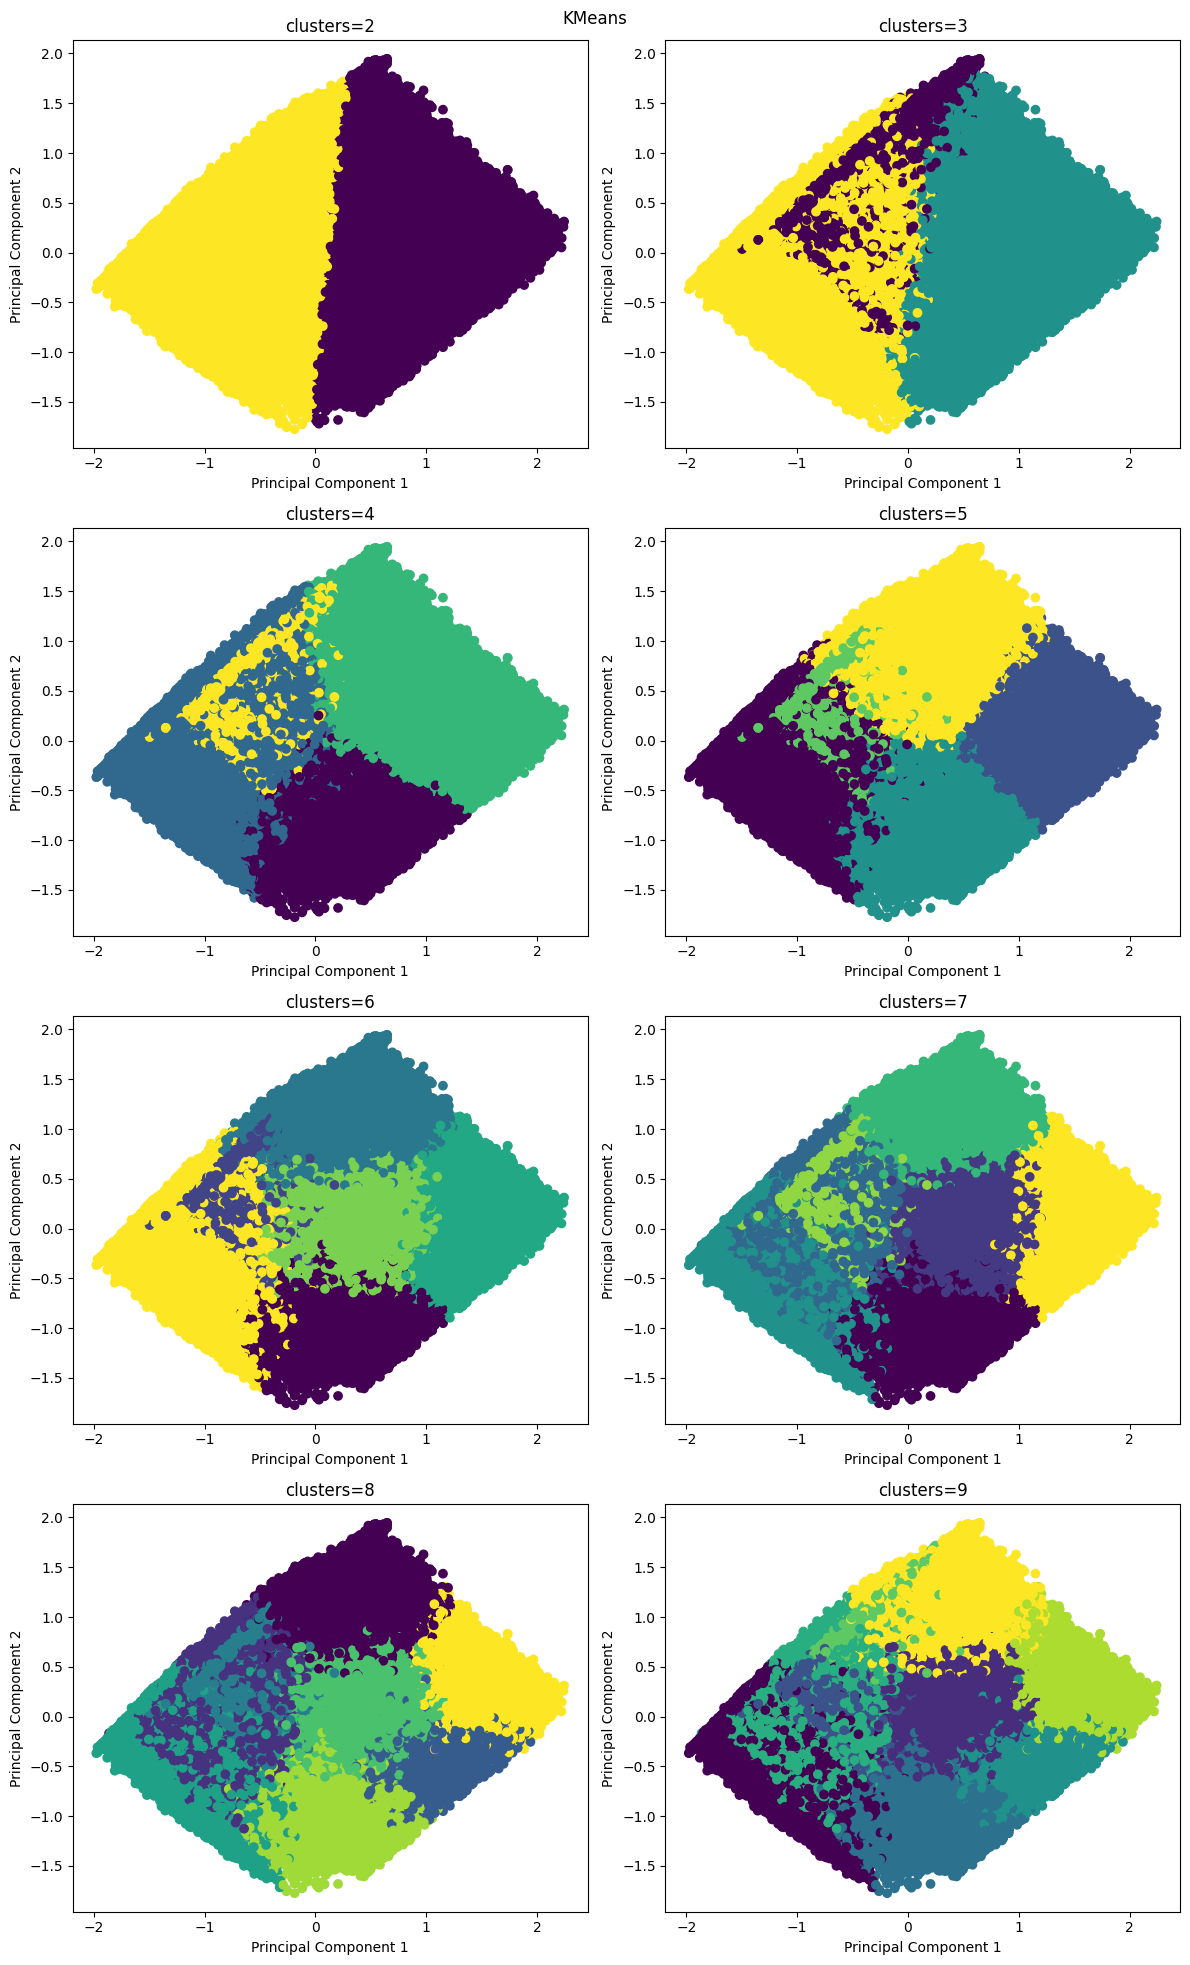

In [7]:
ks = [i for i in range(2, 10)]
sse = []
silhouettes = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("KMeans")

for k, ax in zip(ks, axs.flatten()):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
    ax.set_title(f"clusters={k}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    sse.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

plt.tight_layout()
plt.show()


In [8]:
sse

[263730.23528839817,
 225219.28193281297,
 200375.56466158532,
 179631.11595124082,
 170815.0371667217,
 162996.76267813428,
 157890.14972476976,
 153572.51142381743]

In [9]:
silhouettes

[0.20776751611765548,
 0.21694497017724265,
 0.20520548470969335,
 0.21539250521210124,
 0.20985232617565686,
 0.19338308627703293,
 0.1840098185251886,
 0.15447488876908344]

Text(0, 0.5, 'SSE')

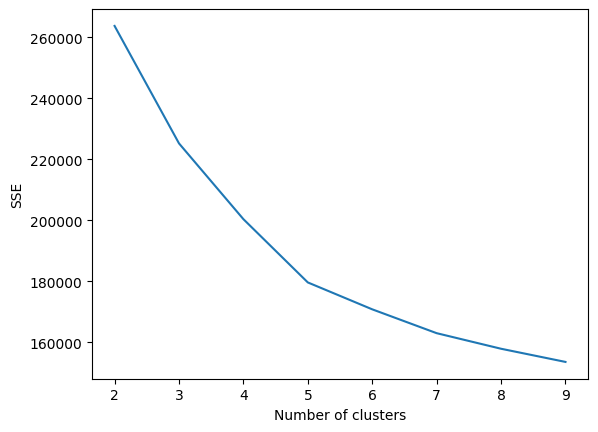

In [10]:
plt.plot(ks, sse)
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

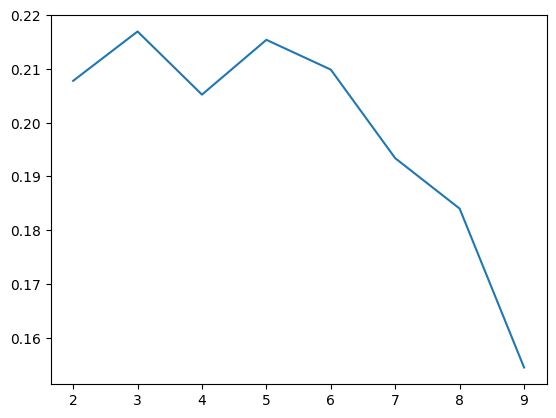

In [11]:
plt.plot(ks, silhouettes)

In [13]:
from sklearn.cluster import BisectingKMeans

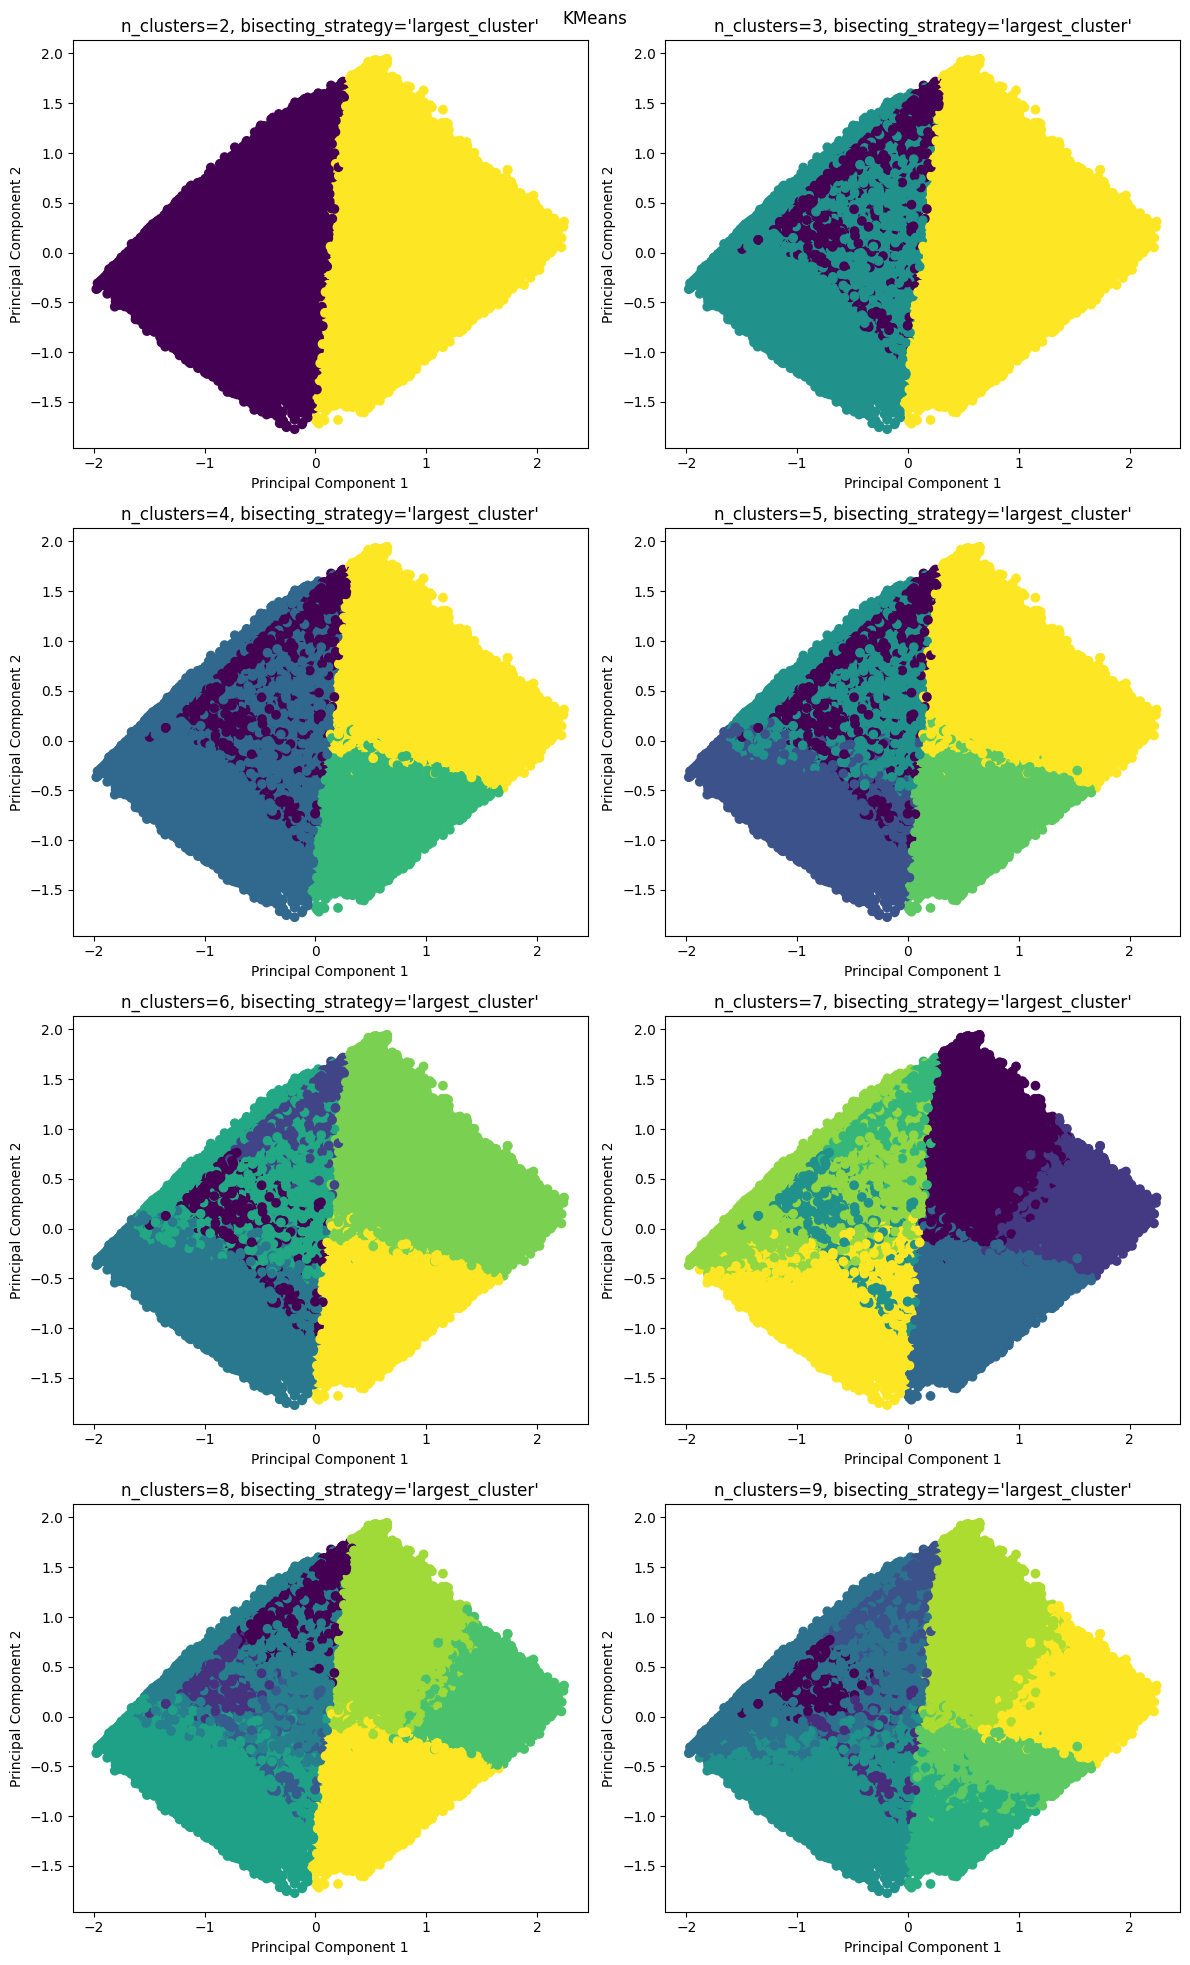

In [14]:
sse_bisecting = []
silhouettes_bisecting = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("KMeans")

for k, ax in zip(ks, axs.flatten()):
    bkmeans = BisectingKMeans(n_clusters=k, bisecting_strategy='largest_cluster')
    bkmeans.fit(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=bkmeans.labels_)
    ax.set_title(f"n_clusters={k}, bisecting_strategy='largest_cluster'")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    sse_bisecting.append(bkmeans.inertia_)
    silhouettes_bisecting.append(silhouette_score(X, bkmeans.labels_))

plt.tight_layout()
plt.show()


In [ ]:
sse_bisecting

[263735.71322036994,
 225962.20330286038,
 206129.65968826352,
 194570.85018455828,
 183937.64817483435,
 174094.7130064088,
 170371.9486220951,
 162412.76507679254]

Text(0, 0.5, 'SSE')

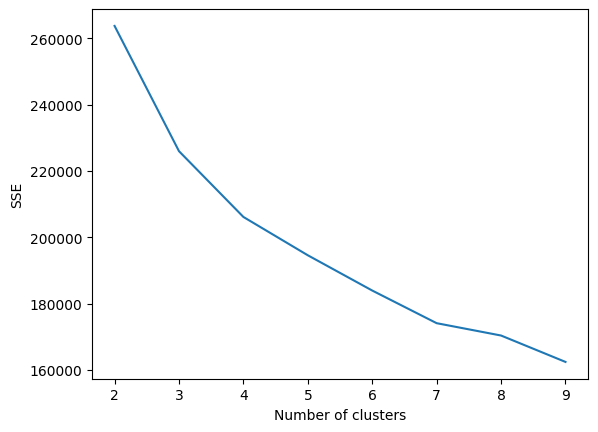

In [ ]:
plt.plot(ks, sse_bisecting)
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

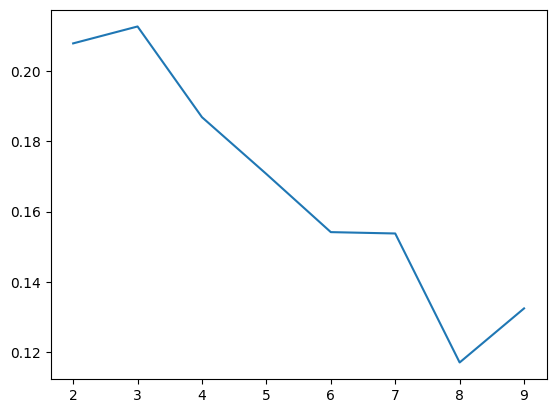

In [ ]:
plt.plot(ks, silhouettes_bisecting)